# Preperation

## Import Packages

In [1]:
#ImportPackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings 
#Display Settings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%0f' % x)
#Plotting Settings
plt.style.use('fivethirtyeight')

## Read Data

In [2]:
#Read in Data -first row has info about dataset so this will be skipped
data = pd.read_excel('pone.0212445.s004.xlsx',skiprows=1)
data.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


## Brief Data Understanding

In [3]:
#General Stats
data.describe()

,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,12.113805,8.507655,16.142182,123914.230769,89210.009615,162458.317308
std,4.978586,4.635330,6.055076,115469.372356,89791.909524,145761.963447
min,1.584032,0.000000,2.998406,1876.000000,0.000000,3552.000000
25%,8.869829,4.911882,12.301325,46667.500000,28057.750000,68507.750000
50%,11.750000,8.165653,15.935119,99751.500000,69407.500000,136812.000000
75%,15.718785,11.617805,19.378361,146335.500000,115101.250000,181302.250000
max,25.000000,18.218028,40.945994,515387.000000,408472.000000,660996.000000


Average Prevalence of HIV in SA is around 12%    

There are 104 rows in the data - as there are 2 estimates per district, that meas 52 districts are included


In [4]:
# Check for missing data
data.isna().sum()

District          0
Code              0
Estimate          0
Prevalence_%      0
Prevalence_LCL    0
Prevalence_UCL    0
NoPLHIV           0
NoPLHIV_LCL       0
NoPLHIV_UCL       0
dtype: int64

There is no missing data

# Required Questions

What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [5]:
#Filter Data for for Survey Estimates and sum NoPLHIV for mean, lcl and ucl levels
total_num_with_HIV= data[data.Estimate =='Survey']['NoPLHIV'].sum()
total_num_with_HIV_LCL= data[data.Estimate =='Survey']['NoPLHIV_LCL'].sum()
total_num_with_HIV_UCL= data[data.Estimate =='Survey']['NoPLHIV_UCL'].sum()
print(f'''The total number of people living with HIV according to the survey estimate is {total_num_with_HIV:,}
with the lower estimate being {total_num_with_HIV_LCL:,} and the higher estimate being {total_num_with_HIV_UCL:,} 
at a 95% confidence level''')

The total number of people living with HIV according to the survey estimate is 6,409,903
with the lower estimate being 4,235,478 and the higher estimate being 8,589,210 
at a 95% confidence level


What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [6]:
#Filter Data for for Xhariep and average NoPLHIV for mean, lcl and ucl levels for both Survey and Fay-Heriott Methodology
ave_Xhariep =data[data.District == 'Xhariep']['NoPLHIV'].mean()
ave_Xhariep_LCL =data[data.District == 'Xhariep']['NoPLHIV_LCL'].mean()
ave_Xhariep_UCL =data[data.District == 'Xhariep']['NoPLHIV_UCL'].mean()

print(f'''The average estimate of people living with HIV in the district Xhariep based on the Survey 
Estimates and the Fay-Herriot methodology is {ave_Xhariep:,}. Looking from a 95% confidence level,
the average should be between {ave_Xhariep_LCL:,} and {ave_Xhariep_UCL:,}''')

The average estimate of people living with HIV in the district Xhariep based on the Survey 
Estimates and the Fay-Herriot methodology is 12,247.5. Looking from a 95% confidence level,
the average should be between 9,458.5 and 15,310.0


Add a column and populate it with the number of people not living with HIV for each row. 

If Prevalence shows what % of town has HIV, and know numbers living with HIV, can  get total number living in town (depending on Estimate Type) based on grossing up number of people living with HIV based on prevalence and then removing number of people with HIV

Rounded to nearest number

In [7]:
data['HIV_Negative_Citizens'] = round(data.NoPLHIV * (100/data['Prevalence_%']) -data.NoPLHIV)

What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)? 

In [8]:
# Filter for cities and metros using regex and the sum number of people living within these cities with HIV
city_data= data[data.District.str.lower().str.contains(r"city|metro")]
city_HIV = city_data.NoPLHIV.sum()
city_data

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,HIV_Negative_Citizens
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,650776.000000
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651517.000000
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3659845.000000
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178.000000
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,4127739.000000
97,City of Johannesburg,JHB,Fay-Heriott,11.075306,8.760104,13.909111,514241,406743,645818,4128890.000000
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1076746.000000
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1067889.000000
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,2727866.000000
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,2748726.000000


In [9]:
print(f"Within South Africa's there are an estimated {city_HIV:,} people living with HIV")

Within South Africa's there are an estimated 2,572,733 people living with HIV


Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output. 

In [10]:
# Use regex to replace special characters
data.columns = data.columns.str.replace(r'[%_]','')
print(data.columns)

Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL',
       'HIVNegativeCitizens'],
      dtype='object')


Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 


In [11]:
# Filter for districts which end in an 'i' for Fay- Heriott Estimation
i_district = data[(data.District.str.contains(r'i$')) & (data.Estimate =='Fay-Heriott')]
#Order based on Prevalence to have easier plot to understand and compare Districts
i_district.sort_values(['Prevalence'], inplace=True)
i_district

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,HIVNegativeCitizens
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748,455346.000000
65,Dr Ruth Segomotsi Mompati,DC39,Fay-Heriott,11.045235,8.164344,14.779090,52136,38538,69761,419887.000000
53,Mopani,DC33,Fay-Heriott,11.294971,7.921185,15.858238,87157,61123,122369,684487.000000
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,312342.000000
93,Ekurhuleni,EKU,Fay-Heriott,13.678908,10.647292,17.405572,441990,344033,562405,2789189.000000
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224,690050.000000
95,eThekwini,ETH,Fay-Heriott,14.537772,11.791222,17.795017,503618,408472,616456,2960585.000000
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179,205899,352321,1442870.000000
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868,421157.000000


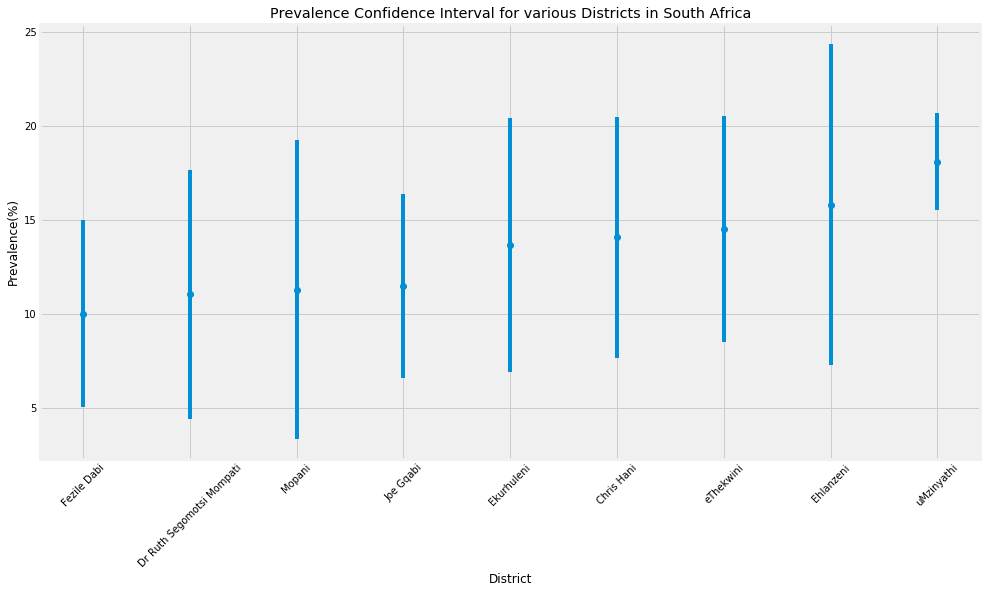

In [12]:
# Plot Parameters
plt.rcParams['figure.figsize'] = [15, 8]
#Find length of Errorbar using ucl and lcl estimates
y_err=i_district.PrevalenceUCL-i_district.PrevalenceLCL
#plot error bar based on District and Prevalence
plt.errorbar(x = i_district.District, y = i_district.Prevalence, yerr= y_err, fmt='o')
#Cosmetic Additions to plot
plt.xticks(rotation=45)
plt.title('Prevalence Confidence Interval for various Districts in South Africa')
plt.xlabel('District')
plt.ylabel('Prevalence(%)')
plt.show()

# Other Exploration

In [13]:
# District with Highest Prevalence
data[data['Prevalence']== max(data['Prevalence'])]

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,HIVNegativeCitizens
82,Central Karoo,DC5,Survey,25.000000,9.054006,40.945994,17808,6449,29167,53424.000000


Central Karoo seems to have the higest Prevalence_% in SA based on Survey Estimates- the confidence interval however is very wide withthe true level 95% likely to fall between 9.054% and 40.946%

In [14]:
data[data.District == 'Central Karoo']

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,HIVNegativeCitizens
82,Central Karoo,DC5,Survey,25.000000,9.054006,40.945994,17808,6449,29167,53424.000000
83,Central Karoo,DC5,Fay-Heriott,12.059893,8.050239,17.682609,8590,5734,12596,62638.000000


Based on Fay-Heriott methodolody, estimates for HIV prevelance seem to be much lower than the Survey Estimates with the Prevalence_UCL for Fay-Heriott being 17.68% which is significantly lower than the 25% Prevalence_% based on Survey Estimates

** Number of time spent - approximately 1 hour and 15 minutes **